In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.by import By
import googletrans
from googletrans import Translator
import numpy as np
import matplotlib.pyplot as plt

In [94]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
options = webdriver.ChromeOptions()
driver = webdriver.Chrome()

In [3]:

translator = Translator()

In [95]:
data = []
def getData():
  driver.implicitly_wait(20)
  url = 'https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar'
  driver.get(url)
  
  while True:
    url = driver.current_url
    print('updated : ',url)
    driver.get(url)

    try:
      for element in driver.find_elements(By.XPATH, "//div[@class='afpl-products afpl-products--fourgrid space-below--huge']//div[@class='flex-row']//div[@class='afpl-product ref-product-card-click']"):
        myString = element.get_attribute('textContent')
        sample = myString.strip()
        sample = [l for l in sample.split('\n') if l.strip()]
        index = 0
        if sample[index].endswith('%'):
          salePercent = sample[index].strip()
        else:
          salePercent = sample[index+1].strip()
          index+=1

        sizeTranslation = translator.translate(sample[index+1].strip())
        sizes = sizeTranslation.text
        brand = sample[index+2].strip()
        translation = translator.translate(sample[index+3].strip())
        item = translation.text
        dTrans = translator.translate(sample[index+4].strip())
        details = dTrans.text
        """if sample[-3].endswith('SEK'):
          prisOld = sample[-3].strip()
        else:
          #prisOld = np.nan
          prisOld = sample[-2].strip()
        
        if sample[-2].endswith('SEK'):
          newprice = sample[-2].strip()
        else:
          #newprice = np.nan
          newprice = sample[-1].strip()"""
        
        if sample[-1].endswith('Prisgaranti'):
          prisOld = sample[-3].strip()
          newprice = sample[-2].strip()
        else:
          prisOld = sample[-2].strip()
          newprice = sample[-1].strip()
          
        data.append([salePercent,sizes,brand,item,details,prisOld,newprice])
      
      print(len(data))
      button = driver.find_element(By.XPATH,"//div[@class='afpl-products afpl-products--fourgrid space-below--huge']//div[@class='afpl-products__nav']//button")
      driver.execute_script("arguments[0].click();", button)
      print('Loading more data')
      time.sleep(30)
    except:
      print('Found no more data to load')
      break
  return data


In [96]:
extractedData = getData()

updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar
44
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=2
88
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=3
132
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=4
176
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=5
220
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=6
264
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=7
308
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=8
352
Loading more data
updated :  https://www.afound.com/sv-se/dam/klader/klanningar/vardagsklanningar?page=9
396
Loading more data
updated :  https://www.afoun

In [98]:
originalData = pd.DataFrame(extractedData, columns=['SalePercent', 'Sizes', 'Brand','Title','Details','OldPrice','NewPrice'])
originalData.tail(10)

,SalePercent,Sizes,Brand,Title,Details,OldPrice,NewPrice
1861,53%,XL,Le Jardin du Lin,Short-sleeved Pleated Front Dress,The strikethrough price at the top shows the s...,890 SEK,419 SEK
1862,61%,S XL,Le Jardin du Lin,Short Stripped Dress With Boat Collar And Knot...,The strikethrough price at the top shows the s...,1 190 SEK,469 SEK
1863,61%,L,Le Jardin du Lin,Mid-length Round Collar Dress With Pockets And...,The strikethrough price at the top shows the s...,1 190 SEK,469 SEK
1864,58%,S,Le Jardin du Lin,Mid-length V-neck Dress With Polka Dots Prints...,The strikethrough price at the top shows the s...,990 SEK,419 SEK
1865,63%,S,Le Jardin du Lin,Long Dress With V-neck And Floral Prints,The strikethrough price at the top shows the s...,1 390 SEK,519 SEK
1866,63%,XL,Le Jardin du Lin,Pure Linen Striped Shirt Dress,The strikethrough price at the top shows the s...,1 390 SEK,519 SEK
1867,61%,S XL,Le Jardin du Lin,Short Stripped Dress With Boat Collar And Knot...,The strikethrough price at the top shows the s...,1 190 SEK,469 SEK
1868,38%,L,COS,Dress With Drawcord Waist Light Turquoise,The strikethrough price at the top shows the s...,790 SEK,490 SEK
1869,64%,EU 44,& Other Stories,Striped Puff Sleeve Midi Dress Stripe,The strikethrough price at the top shows the s...,1 300 SEK,474 SEK
1870,23%,XXS,H&M,Shirt Dress In Lyocell Dark Denim Blue,The strikethrough price at the top shows the s...,299 SEK,229 SEK


In [147]:
df = originalData.drop(['Details'],axis=1)

In [148]:
#df = pd.DataFrame(extractedData, columns=['SalePercent', 'Sizes', 'Brand', 'Title', 'OldPrice','NewPrice'])
print(df.isna().sum())

SalePercent    0
Sizes          0
Brand          0
Title          0
OldPrice       0
NewPrice       0
dtype: int64


In [149]:
brandsCount = pd.crosstab(df['Brand'],df.index).sum(axis=1)
brandsCount

Brand
& Other Stories      147
A PART OF THE ART      5
Arket                185
C&Jo                   2
COS                  273
Cras                   5
Damson Madder          5
Fila                   3
H&M                  797
Le Jardin du Lin      93
Mads Nørgaard          1
Minga London           1
Monki                213
Newhouse              15
Regatta               24
Roxy                   2
Seidensticker         33
Soft Rebels           30
Superdry               1
The Ragged Priest      1
Trespass               4
Weekday               31
dtype: int64

In [150]:
clothesDic = { "Dress" : "Dress",
              "Shirt" : "Shirt",
              "T-shirt" : "T-shirt",
              "Tunic" : "Tunic",
              "Crèmevit" : "Crèmevit",
              "Wool T-shirt" : "Wool T-shirt"}

In [151]:
df['Category'] = "Unidentified"

# Iterate through each title
for i, title in enumerate(df['Title']):
    words = title.split(' ')
    
    # Iterate through each word
    for word in words:
        if word in clothesDic:
            # Assign the category to the corresponding row
            df.at[i, 'Category'] = clothesDic[word]

In [129]:
df['Category'].unique()

array(['Dress', None, 'Tunic', 'T-shirt', 'Shirt', 'Crèmevit'],
      dtype=object)

In [130]:
df.tail(3)

,SalePercent,Sizes,Brand,Title,OldPrice,NewPrice,Category
1868,38%,L,COS,Dress With Drawcord Waist Light Turquoise,790 SEK,490 SEK,Dress
1869,64%,EU 44,& Other Stories,Striped Puff Sleeve Midi Dress Stripe,1 300 SEK,474 SEK,Dress
1870,23%,XXS,H&M,Shirt Dress In Lyocell Dark Denim Blue,299 SEK,229 SEK,Dress


In [152]:
typeCount = pd.crosstab(df['Category'],df.index).sum(axis=1)
typeCount

Category
Crèmevit           2
Dress           1546
Shirt             20
T-shirt           19
Tunic             12
Unidentified     272
dtype: int64

In [133]:
print('Shirt: ',df['Title'].str.contains('Shirt').sum())
print('Coat: ',df['Title'].str.contains('Coat').sum())
print('Dress: ',df['Title'].str.contains('Dress').sum())
print('T-Shirt: ',df['Title'].str.contains('T-shirt').sum())
print('Wool T-Shirt: ',df['Title'].str.contains('Wool T-shirt').sum())
print('Dress: ',df['Title'].str.contains('Dress').sum())

Shirt:  131
Coat:  0
Dress:  1549
T-Shirt:  38
Wool T-Shirt:  3
Dress:  1549


In [153]:
df.shape

(1871, 7)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SalePercent  1871 non-null   object
 1   Sizes        1871 non-null   object
 2   Brand        1871 non-null   object
 3   Title        1871 non-null   object
 4   OldPrice     1871 non-null   object
 5   NewPrice     1871 non-null   object
 6   Category     1871 non-null   object
dtypes: object(7)
memory usage: 102.4+ KB


In [155]:
df.loc[:,'SalePercent'] = df['SalePercent'].str.strip('%').astype(int)
df.loc[:,'SalePercent'] = (df['SalePercent'] / 100)

In [156]:
df.loc[:,'OldPrice'] = df['OldPrice'].str.strip('SEK').str.replace('\xa0', '')
df.loc[:,'NewPrice'] = df['NewPrice'].str.strip('SEK').str.replace('\xa0', '')

In [157]:
df.head(7)

,SalePercent,Sizes,Brand,Title,OldPrice,NewPrice,Category
0,0.65,XS S M L,COS,Oversized-fit Wool T-shirt Dress Black,1100,386,Dress
1,0.59,XS S,Arket,Short Sleeve Sweatshirt Dress Black,295,240,Dress
2,0.6,XXS XS S,H&M,Ribbed Bodycon Dress Black,149,60,Dress
3,0.5,Available in several sizes,Arket,Cotton Voile Dress Black/white,400,395,Dress
4,0.52,M L,COS,Ruched Calf Length Dress With Slim Fit,990,475,Dress
5,0.59,XS S M L,COS,Wool T-shirt Dress With Oversized Fit Navy Blue,1100,447,Dress
6,0.45,M L,COS,Asymmetric Ruched Midi Dress Black,1000,550,Dress


In [158]:
df['SalePercent'] = df['SalePercent'].astype(float)
df['OldPrice'] = df['OldPrice'].astype(int)
df['NewPrice'] = df['NewPrice'].astype(int)

In [159]:
df['SalePercent'] = df['SalePercent'].round(2)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePercent  1871 non-null   float64
 1   Sizes        1871 non-null   object 
 2   Brand        1871 non-null   object 
 3   Title        1871 non-null   object 
 4   OldPrice     1871 non-null   int32  
 5   NewPrice     1871 non-null   int32  
 6   Category     1871 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 87.8+ KB


In [167]:
df['RowId'] = range(1,len(df)+1)

In [164]:
df.head()

,SalePercent,Sizes,Brand,Title,OldPrice,NewPrice,Category,RowId
0,0.65,XS S M L,COS,Oversized-fit Wool T-shirt Dress Black,1100,386,Dress,1
1,0.59,XS S,Arket,Short Sleeve Sweatshirt Dress Black,295,240,Dress,2
2,0.60,XXS XS S,H&M,Ribbed Bodycon Dress Black,149,60,Dress,3
3,0.50,Available in several sizes,Arket,Cotton Voile Dress Black/white,400,395,Dress,4
4,0.52,M L,COS,Ruched Calf Length Dress With Slim Fit,990,475,Dress,5


In [166]:
df.to_csv('aFoundData.csv', index=False)
df.to_csv('aFoundData.txt', index=False)


In [168]:
ddf = pd.read_csv('aFoundData.csv')
ddf.head(5)

,SalePercent,Sizes,Brand,Title,OldPrice,NewPrice,Category,RowId
0,0.65,XS S M L,COS,Oversized-fit Wool T-shirt Dress Black,1100,386,Dress,1
1,0.59,XS S,Arket,Short Sleeve Sweatshirt Dress Black,295,240,Dress,2
2,0.60,XXS XS S,H&M,Ribbed Bodycon Dress Black,149,60,Dress,3
3,0.50,Available in several sizes,Arket,Cotton Voile Dress Black/white,400,395,Dress,4
4,0.52,M L,COS,Ruched Calf Length Dress With Slim Fit,990,475,Dress,5


In [169]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePercent  1871 non-null   float64
 1   Sizes        1871 non-null   object 
 2   Brand        1871 non-null   object 
 3   Title        1871 non-null   object 
 4   OldPrice     1871 non-null   int64  
 5   NewPrice     1871 non-null   int64  
 6   Category     1871 non-null   object 
 7   RowId        1871 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 117.1+ KB


In [31]:
ddf.isnull().sum()

SalePercent    0
Sizes          0
Brand          0
Title          0
OldPrice       0
NewPrice       0
dtype: int64

In [32]:
popularBrands = pd.crosstab(df['Brand'],df.index).sum(axis=1).astype(int)
popularBrands

Brand
& Other Stories    150
Arket              186
COS                278
H&M                802
Monki              218
Regatta              9
Trespass             4
Weekday             31
dtype: int32

<Axes: title={'center': 'Brands Popularity Chart'}, xlabel='Brand'>

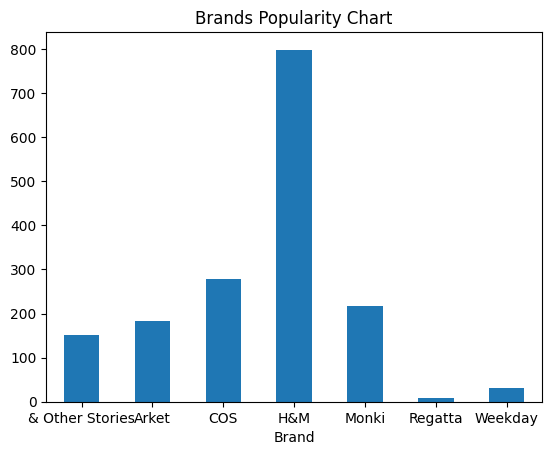

In [9]:
popularBrands.plot(kind='bar', rot=0, title='Brands Popularity Chart')

In [12]:
hm = df[df['Brand'].str.contains('H&M')]
hm.head(3)

,SalePercent,Sizes,Brand,Title,OldPrice,NewPrice,RowId
3,0.55,XS S,H&M,Knitted Bodycon Dress Purple,399,179,4
4,0.48,XL,H&M,Shirt Dress With Tie Belt White,249,129,5
6,0.60,XS,H&M,Ribbed Dress Black,199,80,7


In [14]:
pd.crosstab(hm['Sizes'],hm.index).sum(axis=1)

Sizes
4XL                            9
Available in several sizes    50
EU 32                          4
EU 34                          1
EU 34 EU 36 EU 38              1
                              ..
XXS XS S M L XL               19
XXS XS S M XL                  4
XXS XS S XL                    1
XXXL                           1
XXXL 4XL                       3
Length: 103, dtype: int64

In [21]:
hm['SalePercent'].unique()

array([0.55, 0.48, 0.6 , 0.7 , 0.5 , 0.35, 0.68, 0.65, 0.47, 0.37, 0.46,
       0.4 , 0.57, 0.54, 0.45, 0.77, 0.25, 0.44, 0.75, 0.33, 0.73, 0.43,
       0.2 , 0.34, 0.58, 0.62, 0.53, 0.72, 0.52, 0.64, 0.49, 0.38, 0.76,
       0.36, 0.63, 0.61, 0.66, 0.74, 0.3 , 0.23, 0.71, 0.39, 0.28, 0.29,
       0.67, 0.69, 0.31, 0.27, 0.24, 0.42])

In [ ]:
for sp in range(len(hm['SalePercent'])):
  if hm['SalePercent'][sp] <= 0.30:
    hm['SalePercentCategroy'][sp] = 'Less then 30%'
  elif hm['SalePercent'][sp] > 0.30 and hm['SalePercent'][sp] <= 0.40:
    hm['SalePercentCategroy'][sp] = 'Between 30% to 40%'
  elif hm['SalePercent)'][sp] > 0.40 and hm['SalePercent'][sp] <= 0.60:
    hm['SalePercentCategory'][sp] = 'Between 40% to 60%'
  elif hm['SalePercent'][sp] > 0.60:
    hm['SalePercentCategory'][sp] = 'Above 60%'